# Hierarchical clustering: structured vs unstructured ward
Following example builds a swiss roll dataset and runs hierarchical clustering on their position
* First Step : the hierarchical clustering is performed without connectivity constraints on the structure and is solely based on distance
* whereas in a second step the clustering is restricted to the k-Nearest Neighbors graph: it's a hierarchical clustering with structured prior

In [17]:
#Authors: The scikit-learn developers
#Writer: wang
# SPDX-License-Identifier : BSD-3-Clause

In [18]:
import time as time
#The following import is required
#for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d
import numpy as np

### Generate data
* Generate the Swiss Roll dataset 生成瑞士卷数据集

In [19]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

### Compute clustering
* We perform AgglomerativeClustering which comes under Hierarchical without any connectivity constraints

In [20]:
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed tiem:{elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured clustering...
Elapsed tiem:0.03s
Number of points: 1500


### Plot results
* plotting the unstructured hierarchical clusters

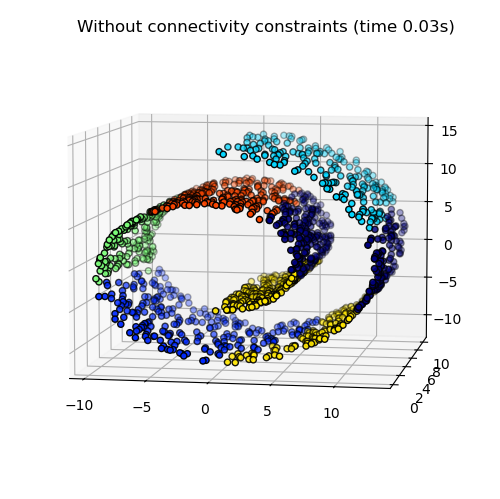

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])

for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")
plt.show()


### Define k-Nearest Neighbors with 10 neighbors

In [22]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

### Compute clustering
* Perform AgglomerativeClustering again with connectivity constraints.

In [23]:
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward",
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute structured hierarchical clustering...
Elapsed time: 0.04s
Number of points: 1500


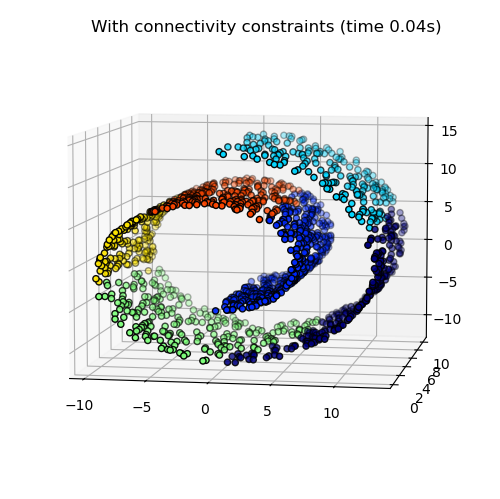

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig2 = plt.figure()
# ✅ 正确：azim，而不是 axim
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])

for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")
plt.show()

